# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
response=browser.html
data = soup(response, 'html.parser')



In [6]:
# Extract all rows of the data
rows = data.find_all('tr',class_="data-row")


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty list
rows_list = []

# Loop through the scraped data to create a list of rows
for row in rows:
    cols = row.find_all('td')  # Find all the columns in each row
    cols = [ele.text.strip() for ele in cols]  # Extract the text and strip any extra whitespace
    rows_list.append(cols)  # Append to the data list



In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
columns=["id","terestrial_date","sol","ls","month","min_temp","pressure"]
df = pd.DataFrame(rows_list, columns=columns)


In [9]:
# Confirm DataFrame was created successfully
print(df.head())

   id terestrial_date sol   ls month min_temp pressure
0   2      2012-08-16  10  155     6    -75.0    739.0
1  13      2012-08-17  11  156     6    -76.0    740.0
2  24      2012-08-18  12  156     6    -76.0    741.0
3  35      2012-08-19  13  157     6    -74.0    732.0
4  46      2012-08-20  14  157     6    -74.0    740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
print(df.dtypes)

id                 object
terestrial_date    object
sol                object
ls                 object
month              object
min_temp           object
pressure           object
dtype: object


In [11]:
df.terestrial_date=pd.to_datetime(df.terestrial_date)
df.sol=df.sol.astype(int)
df.ls=df.ls.astype(int)
df.month=df.month.astype(int)
df.min_temp=df.min_temp.astype(float)
df.pressure=df.pressure.astype(float)

In [12]:
# Confirm type changes were successful by examining data types again

# Check the data types of each column
print(df.dtypes)


id                         object
terestrial_date    datetime64[ns]
sol                         int32
ls                          int32
month                       int32
min_temp                  float64
pressure                  float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months are there on Mars?
unique_mars_months = df['month'].nunique()
print(f"There are {unique_mars_months} months on Mars based on the dataset.")


There are 12 months on Mars based on the dataset.


In [14]:
# 2. How many Martian days' worth of data are there?
unique_mars_days = df['sol'].nunique()
print(f"There are {unique_mars_days} Martian days' worth of data in the dataset.")


There are 1867 Martian days' worth of data in the dataset.


In [15]:
# 3. What is the average low temperature by month?
avg_min_temp_by_month = df.groupby('month')['min_temp'].mean()
print(avg_min_temp_by_month)



month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


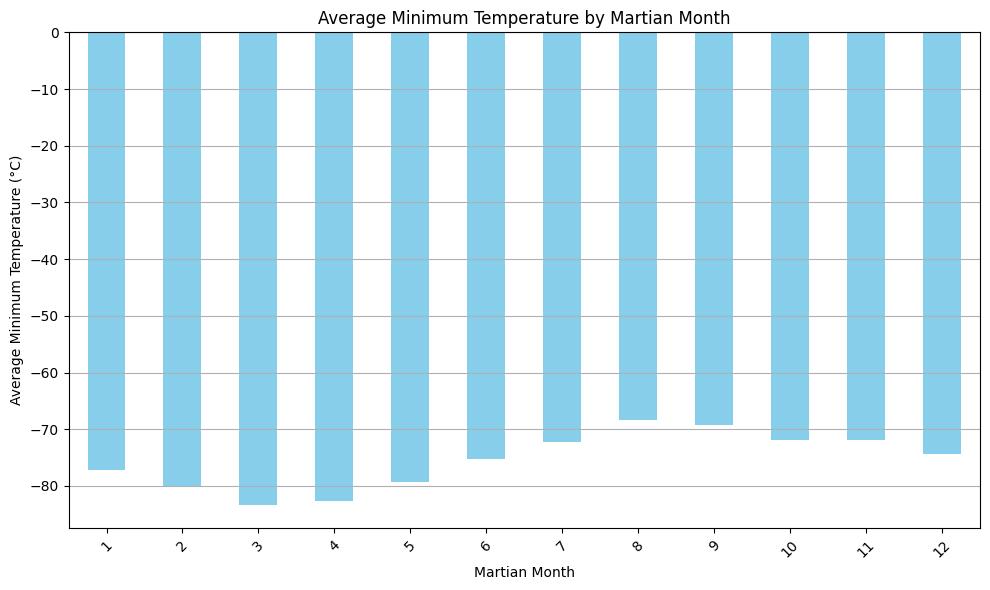

In [16]:
# Plot the average temperature by month
# Group by month and calculate the mean temperature
avg_temp_by_month = df.groupby('month')['min_temp'].mean()

# Plot the average temperature by month
avg_temp_by_month.plot(kind='bar', figsize=(10,6), color='skyblue')
plt.title('Average Minimum Temperature by Martian Month')
plt.xlabel('Martian Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


In [17]:
# Identify the coldest and hottest months in Curiosity's location
# Identify the coldest month
coldest_month = avg_temp_by_month.idxmin()
coldest_temp = avg_temp_by_month.min()

# Identify the hottest month
hottest_month = avg_temp_by_month.idxmax()
hottest_temp = avg_temp_by_month.max()

print(f"The coldest month in Curiosity's location is {coldest_month} with an average minimum temperature of {coldest_temp}°C.")
print(f"The hottest month in Curiosity's location is {hottest_month} with an average minimum temperature of {hottest_temp}°C.")


The coldest month in Curiosity's location is 3 with an average minimum temperature of -83.30729166666667°C.
The hottest month in Curiosity's location is 8 with an average minimum temperature of -68.38297872340425°C.


In [18]:
# 4. Average pressure by Martian month
# Group by month and calculate the mean pressure
avg_pressure_by_month = df.groupby('month')['pressure'].mean()

print(avg_pressure_by_month)



month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


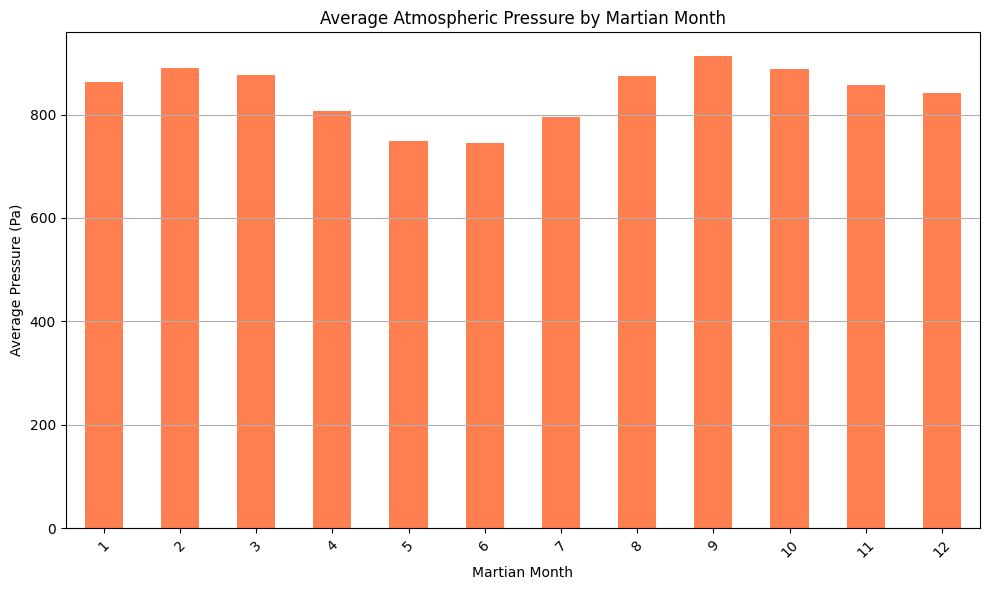

In [19]:
# Plot the average pressure by month
avg_pressure_by_month.plot(kind='bar', figsize=(10,6), color='coral')
plt.title('Average Atmospheric Pressure by Martian Month')
plt.xlabel('Martian Month')
plt.ylabel('Average Pressure (Pa)')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


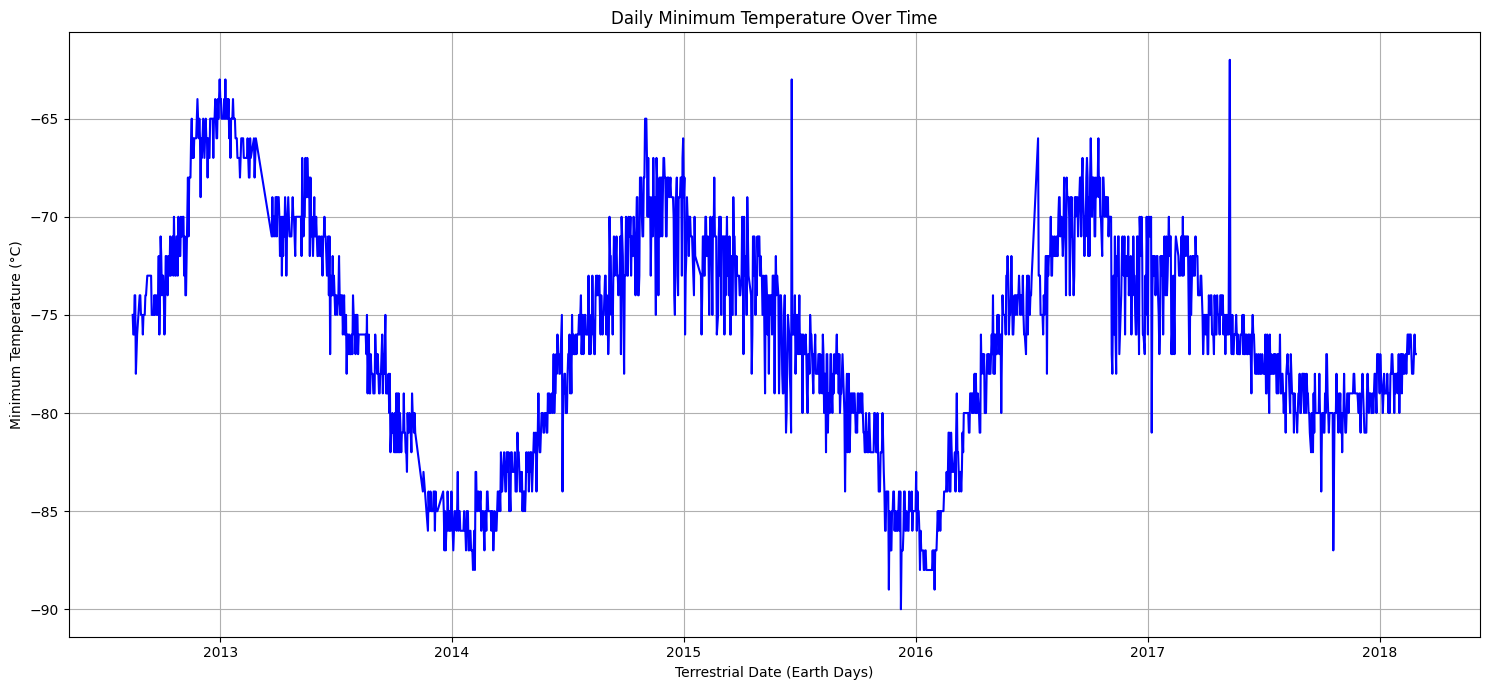

In [22]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Convert the terrestrial_date column to datetime format
df['terestrial_date'] = pd.to_datetime(df['terestrial_date'])

# Plot the daily minimum temperature against terrestrial date
plt.figure(figsize=(15,7))
plt.plot(df['terestrial_date'], df['min_temp'], label='Minimum Temperature', color='blue')
plt.title('Daily Minimum Temperature Over Time')
plt.xlabel('Terrestrial Date (Earth Days)')
plt.ylabel('Minimum Temperature (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [ ]:
# Write the data to a CSV
df.to_csv('mars_weather_data.csv', index=False)

In [ ]:
browser.quit()